### Machine Learning Full Pipeline on Heart Disease UCI Dataset

**Data Handling & Cleaning**

In [1]:
import pandas as pd
import csv

In [2]:
#Load the dataset using Pandas
df = pd.read_csv('heart_disease_uci.csv')

In [3]:
#displaying the first 5 rows
display(df.head())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
#finding out the null values 
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [5]:
df = df.fillna(df.median(numeric_only=True))   # fill numeric NaNs with median
df = df.fillna(df.mode().iloc[0])

C:\Users\hp\AppData\Local\Temp\ipykernel_15756\4161223533.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(df.mode().iloc[0])


**Encoding**

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
categorical_cols = ['cp', 'thal', 'slope']  # adjust based on your dataset
numerical_cols = ['age', 'chol', 'thalch', 'oldpeak', 'ca']  # rest

# Preprocessor: scale numeric + encode categorical
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_cols),('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

**Standardiziation**

In [33]:
X = df[categorical_cols + numerical_cols]
y = df['num']

In [34]:
X1 = preprocessor.fit_transform(X)

**Data Visualization**

1-Matplotlib

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
plt.figure(figsize=(10,8))
%matplotlib inline
plt.style.use('dark_background')
import pandas as pd

<Figure size 1000x800 with 0 Axes>

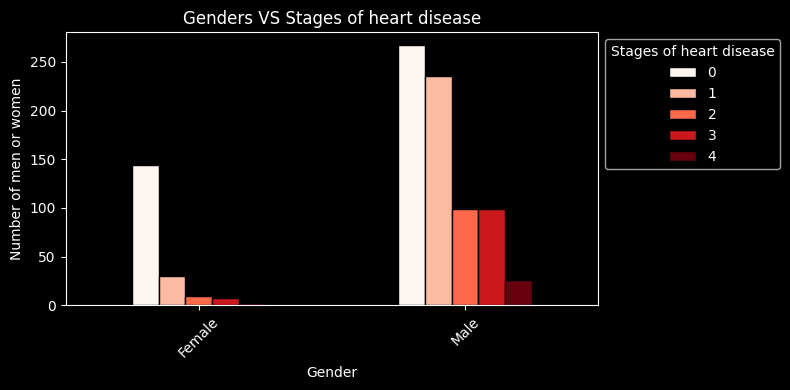

In [18]:
#Genders VS Stages of heart disease
grouped= df.groupby(['sex', 'num']).size().unstack()

grouped.plot(kind='bar',figsize=(8,4), edgecolor='black', colormap='Reds')

plt.title('Genders VS Stages of heart disease')
plt.xlabel('Gender')
plt.ylabel('Number of men or women')
plt.xticks(rotation=45)
plt.legend(title='Stages of heart disease', bbox_to_anchor=(1,1), loc='upper left')
plt.tight_layout()
plt.show()

2-Seaborn

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

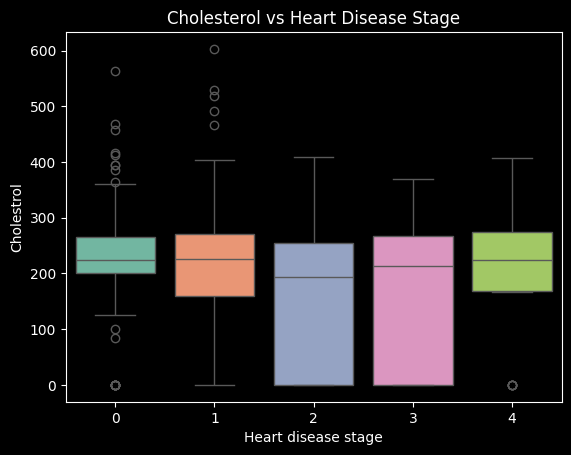

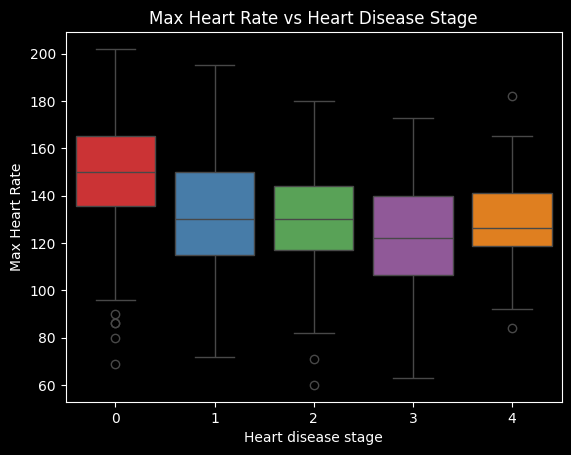

In [67]:
sns.boxplot(x='num', y='chol', data=df,hue='num',palette="Set2",legend=False)
plt.title("Cholesterol vs Heart Disease Stage")
plt.xlabel('Heart disease stage')
plt.ylabel('Cholestrol')
plt.show()

sns.boxplot(x='num', y='thalch', data=df,hue='num',palette="Set1",legend=False)
plt.title("Max Heart Rate vs Heart Disease Stage")
plt.xlabel('Heart disease stage')
plt.ylabel('Max Heart Rate')
plt.show()




3-Plotly

In [20]:
import plotly.express as px

In [68]:

df_plot = df.dropna(subset=["thalch"])
fig = px.scatter(
    df_plot, 
    x="age", 
    y="chol", 
    color="sex",         # color by sex (male/female)
    size="thalch",       # size = max heart rate
    animation_frame="num",  # moving frames = disease stage
    title="Heart Disease Stages "
)

fig.show()


In [35]:
ohe = preprocessor.named_transformers_['cat']   # the OneHotEncoder inside ColumnTransformer
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

In [37]:
all_feature_names = list(numerical_cols) + list(ohe_feature_names)
X1_df = pd.DataFrame(X1.toarray() if hasattr(X1, "toarray") else X1, 
                     columns=all_feature_names)

In [38]:
X1_df["target"] = y.values

In [40]:
X1_df.to_csv("cleaned_scaled.csv", index=False)